In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [2]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [3]:
df.head()

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


### Linear regression equation for this data.

In [4]:
from sklearn.linear_model import LinearRegression
x=df['Ground Temperature']
y=df['Chirps/Second']
print(x.shape)
print(y.shape)

(15,)
(15,)


In [5]:
# re-shaping the feature and Target to Array from Pandas Series
x=np.array(x).reshape(-1,1)
y=np.array(y).reshape(-1,1)
print(x.shape)
print(y.shape)

(15, 1)
(15, 1)


In [6]:
# Creating a Linear Regression Model with feature and target columns
model=LinearRegression()
result=model.fit(x,y)

In [7]:
# Predicting the chirp/second for given value from the model.
model.predict([[71.6]])

array([[14.99409541]])

### Original data and equation on the chart

Constant value (c): [0.45931465]
Slope    value (m): [[0.20299973]]


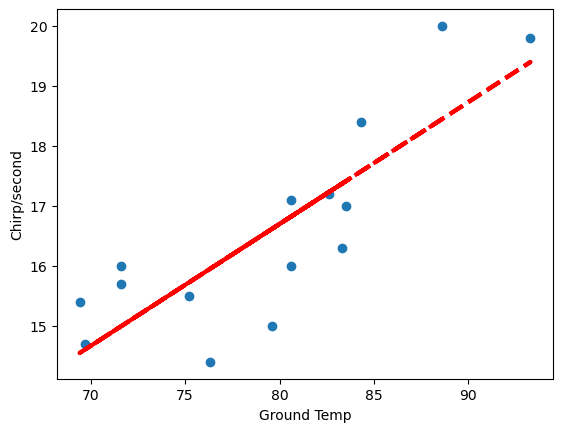

In [8]:
print('Constant value (c):',model.intercept_)
print('Slope    value (m):',model.coef_)

plt.scatter(x,y)                                       ## Plotting the points
y_new = 0.20299973*x + 0.45931465                      ## Defining the equation and
plt.plot(x,y_new, 'r--',lw=3, label='regression line') ## Plotting the line, x is the same for both,
                                                       ## but y_new is the lines predicted by the equation
plt.xlabel('Ground Temp', fontsize=10)                 ## Defining the x-label name
plt.ylabel('Chirp/second', fontsize=10)                ## Defining the y-label name
plt.show()  

### Finding the equation's  𝑅2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [9]:
from sklearn.metrics import r2_score

y_predicted = model.predict(x)     # Predicted result from trained model.

r2 = r2_score(y, y_predicted)      #r2 score between actual target data and predicted data
print('r2 score for perfect model is', r2)

r2 score for perfect model is 0.6922946529147


### Extrapolate data: If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?

In [10]:
# Predicting the chirp/second for given value from the model.
x_inp = 95
res=model.predict([[x_inp]])
print(f"The expected chirp rate of cricket at {x_inp} temp is {res} chirp per sec.")

The expected chirp rate of cricket at 95 temp is [[19.74428913]] chirp per sec.


### Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. What was the approximate ground temperature that morning?

In [11]:
start_temp=60
end_temp=100
inp_chirp_rate = 18

for i in range(start_temp,end_temp+1):
    res1=model.predict([[i]])
    res1=int(res1)
    if inp_chirp_rate == res1:
        print('Approximate temp for 18 chirps per second is', i)   
        break

Approximate temp for 18 chirps per second is 87


# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [12]:
df = pd.read_fwf("brain_body.txt")

x=df['Brain']
y=df['Body']
print(x.shape)
print(y.shape)
print(df.head())

(62,)
(62,)
     Brain   Body
0    3.385   44.5
1    0.480   15.5
2    1.350    8.1
3  465.000  423.0
4   36.330  119.5


In [13]:
# re-shaping the feature and Target to Array from Pandas Series
x=np.array(x).reshape(-1,1)
y=np.array(y).reshape(-1,1)
print(x.shape)
print(y.shape)

(62, 1)
(62, 1)


In [14]:
# Creating a Linear Regression Model with feature(brain_weight) and target column(body_weight).
model=LinearRegression()
result=model.fit(x,y)

### Charting the original data and the equation on the chart

In [15]:
print('Constant value (c):',model.intercept_)
print('Slope    value (m):',model.coef_)

Constant value (c): [91.00439621]
Slope    value (m): [[0.96649637]]


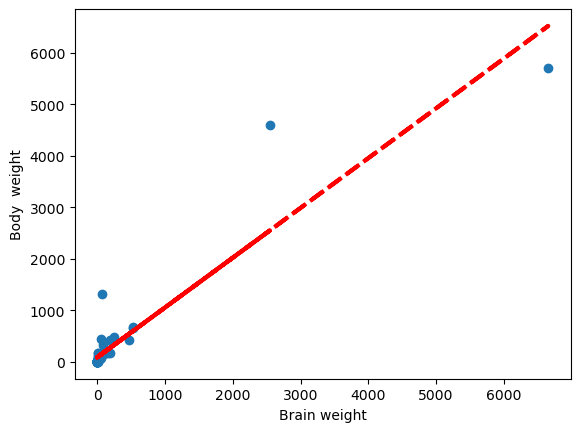

In [16]:
plt.scatter(x,y)                                       ## Plotting the points
y_new = 0.96649637*x + 91.00439621                     ## Defining the equation and
plt.plot(x,y_new, 'r--',lw=3, label='regression line') ## Plotting the line, x is the same for both,
                                                       ## but y_new is the lines predicted by the equation
plt.xlabel('Brain weight', fontsize=10)                ## Defining the x-label name
plt.ylabel('Body  weight', fontsize=10)                ## Defining the y-label name
plt.show()  

### 𝑅2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [17]:
from sklearn.metrics import r2_score

y_predicted = model.predict(x)           # Predicted result from trained model.

r2 = model.score(y, y_predicted)         #r2 score between actual target data and predicted data using .score() method. 
print('r2 score for perfect model is', r2)


r = r2_score(y, y_predicted)             #r2 score between actual target data and predicted data using r2_sscore() method. 
print('r2 score for perfect model is', r)

r2 score for perfect model is 0.8536290611370148
r2 score for perfect model is 0.8726620843043331


# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [18]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


### Linear regression equation for this data using columns 1-5 to column 6 

In [19]:
x=df[['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']].values
y=df[['Salary']].values

In [20]:
from sklearn.model_selection import train_test_split
 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [21]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

In [22]:
lin_reg.predict([[0,3,19,0,30]])

array([[32771.53611383]])

### Find the selection of columns with the best  𝑅2  score

In [23]:
from sklearn.metrics import r2_score

y_predicted = lin_reg.predict(x)     # Predicted result from trained model.

r2 = r2_score(y, y_predicted)        #r2 score between actual target data and predicted data
print('r2 score for perfect model is', r2)

r2 score for perfect model is 0.8380697946567857


### Report whether sex is a factor in salary.

In [24]:
# Model prediction of Salary for Female Sex candidate
lin_reg.predict([[0,3,19,0,30]])

array([[32771.53611383]])

In [25]:
# Model prediction of Salary for Male Sex candidate
lin_reg.predict([[1,3,19,0,30]])

'''
As seen the Salary for Female is 32771.53 where as Male is 34020.72. So Sex(gender) is factor for Salary. 
'''

'\nAs seen the Salary for Female is 32771.53 where as Male is 34020.72. So Sex(gender) is factor for Salary. \n'

In [26]:
# EDA.. T-test on Sex and Salary columns. 
import scipy.stats as stats
print(stats.ttest_ind(df['Sex'],df['Salary'], equal_var=True))

Ttest_indResult(statistic=-29.000675129513745, pvalue=4.555331650520294e-51)


In [27]:
'''
As seen above, the pvalue is less than -0.5. Hence both columns Salary is dependent on Sex. Failed to reject the Hypothesis situation. 
'''

'\nAs seen above, the pvalue is less than -0.5. Hence both columns Salary is dependent on Sex. Failed to reject the Hypothesis situation. \n'